In [42]:
def loadtiff3d(filepath):
    """Load a tiff file into 3D numpy array"""

    import tifffile as tiff
    a = tiff.imread(filepath)

    stack = []
    for sample in a:
        stack.append(np.rot90(np.fliplr(np.flipud(sample))))
    out = np.dstack(stack)

    return out

def writetiff3d(filepath, block):
    import tifffile as tiff

    try:
        os.remove(filepath)
    except OSError:
        pass

    with tiff.TiffWriter(filepath, bigtiff=False) as tif:
        for z in range(block.shape[2]):
            saved_block = np.rot90(block[:, :, z])
            tif.save(saved_block.astype('uint8'), compress=0)

In [43]:
def compute_confusion(gt, pred, threshold=40):
    gt = (gt > 0).astype('int')
    pred = (pred > threshold).astype('int')
    # print(gt.shape)
    # print(pred.shape)
    TP = np.sum(pred[gt == 1])
    FP = np.sum(pred[gt == 0])
    FN = np.sum(gt[pred == 0])

#     print('TP: {}; FP: {}; FN: {}'.format(TP, FP, FN))

    if TP + FP == 0:
        precision = 0
    else:
        precision = TP / (TP + FP)
    if TP + FN == 0:
        recall = 0
    else:
        recall = TP / (TP + FN)
    # f1 = (2 * (recall * precision)) / (recall + precision)
    if np.isnan(precision):
        precision = 0
    if np.isnan(recall):
        recall = 0
#     print('precision: {}, recall: {}'.format(precision, recall))
    return precision, recall,TP, FN, FP

In [44]:
def iou_3d(gt, pred, threshold=40):
    gt = (gt > 0).astype('int')
    pred = (pred > threshold).astype('int')
    interArea = max(0, pred - gt + 1) * max(0, yB - yA + 1)

In [172]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np

prefix = '/media/jacktang/Work/USYD/Research/Deep_Learning/GAN/pytorch-CycleGAN-and-pix2pix/datasets/datasets/fly/fly3d/seg/val/'
gt_path = prefix + 'labels/'
predict_path = prefix + 'predict/'
result_metric_basic = [[0,1]]

for i in range(0,120,1):
    eva_metric = np.array([0.0,0.0,0.0,0.0,0.0])
    for f in os.listdir(predict_path):
        predict = loadtiff3d(predict_path+f)
        gt = loadtiff3d(gt_path+f.rstrip('.tif')+'_gt.tif')

        result = compute_confusion(gt, predict, i)
        eva_metric += np.array(result)
    
    eva_metric/=5
#     print(i, eva_metric[:2]*100)
    result_metric_basic.append([eva_metric[0],eva_metric[1]])

result_metric_basic.append([1,0])
result_metric_basic = np.array(result_metric_basic)    
# print('auc', auc(result_metric_basic[:,0], result_metric_basic[:,1]))
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])    
# plt.plot(result_metric[:,0], result_metric[:,1] , label='no syn')

In [173]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np

prefix = '/media/jacktang/Work/USYD/Research/Deep_Learning/GAN/pytorch-CycleGAN-and-pix2pix/datasets/datasets/fly/fly3d/seg/val/'
gt_path = prefix + 'labels/'
predict_path = prefix + 'predict_extra/'
result_metric_extra = [[0,1]]

for i in range(0,120,1):
    eva_metric = np.array([0.0,0.0,0.0,0.0,0.0])
    for f in os.listdir(predict_path):
        predict = loadtiff3d(predict_path+f)
        gt = loadtiff3d(gt_path+f.rstrip('.tif')+'_gt.tif')

        result = compute_confusion(gt, predict, i)
        eva_metric += np.array(result)
    
    eva_metric/=5
#     print(i, eva_metric[:2]*100)
    result_metric_extra.append([eva_metric[0],eva_metric[1]])

result_metric_extra.append([1,0])
result_metric_extra = np.array(result_metric_extra)  
# print('auc', auc(result_metric_extra[:,0], result_metric_extra[:,1]))

In [174]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np

prefix = '/media/jacktang/Work/USYD/Research/Deep_Learning/GAN/pytorch-CycleGAN-and-pix2pix/datasets/datasets/fly/fly3d/seg/val/'
gt_path = prefix + 'labels/'
predict_path = prefix + 'predict_aug/'
result_metric_aug = [[0,1]]

for i in range(0,120,1):
    eva_metric = np.array([0.0,0.0,0.0,0.0,0.0])
    for f in os.listdir(predict_path):
        predict = loadtiff3d(predict_path+f)
        gt = loadtiff3d(gt_path+f.rstrip('.tif')+'_gt.tif')

        result = compute_confusion(gt, predict, i)
        eva_metric += np.array(result)
    
    eva_metric/=5
#     print(i, eva_metric[:2]*100)
    result_metric_aug.append([eva_metric[0],eva_metric[1]])

result_metric_aug.append([1,0])
result_metric_aug = np.array(result_metric_aug)  
# print('auc', auc(result_metric_extra[:,0], result_metric_extra[:,1]))

In [169]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np

prefix = '/media/jacktang/Work/USYD/Research/Deep_Learning/GAN/pytorch-CycleGAN-and-pix2pix/datasets/datasets/fly/fly3d/seg/val/'
gt_path = prefix + 'labels/'
predict_path = prefix + 'predict_aug_syn/'
result_metric_aug_syn = [[0,1]]

for i in range(0,255,10):
    eva_metric = np.array([0.0,0.0,0.0,0.0,0.0])
    for f in os.listdir(predict_path):
        predict = loadtiff3d(predict_path+f)
        gt = loadtiff3d(gt_path+f.rstrip('.tif')+'_gt.tif')

        result = compute_confusion(gt, predict, i)
        eva_metric += np.array(result)
    
    eva_metric/=5
#     print(i, eva_metric[:2]*100)
    result_metric_aug_syn.append([eva_metric[0],eva_metric[1]])

result_metric_aug_syn.append([1,0])
result_metric_aug_syn = np.array(result_metric_aug_syn)  
# print('auc', auc(result_metric_extra[:,0], result_metric_extra[:,1]))

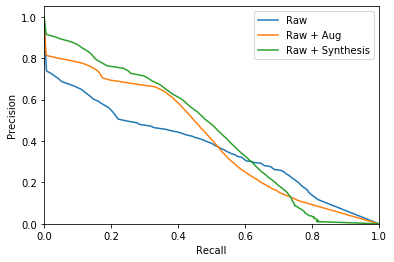

In [175]:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(result_metric_basic[:,0], result_metric_basic[:,1] , label='Raw')
plt.plot(result_metric_aug[:,0], result_metric_aug[:,1] , label='Raw + Augmentation')
plt.plot(result_metric_extra[:,0], result_metric_extra[:,1] , label='Raw + Synthesis')
# plt.plot(result_metric_aug_syn[:,0], result_metric_aug_syn[:,1] , label='Raw + Aug + Synthesis')
# plt.title('The segmenetation ROC for different data')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="best")

In [ ]:
0.3685

In [64]:
result_metric = np.array(result_metric)
print(result_metric[:,0])

[0.         0.00519608 0.00743223 0.07477626 0.1389566  0.19361911
 0.21739999 0.31768609 0.41357253 0.47253826 0.51015368 0.54206886
 0.57392713 0.60056105 0.65128678 0.68202282 0.71545975 0.7306454
 0.74494396 0.75781531 0.76872435 0.78116991 0.78979994 0.7996498
 0.81086048 0.82064584 0.82850071 0.83954457]


In [ ]:
syn:
30 [41.00380123 60.26141076]
35 [45.80912308 54.04797205]
40 [49.87409335 48.23135665]
45 [53.45303027 42.68083732]
50 [56.8116825  37.45801912]
55 [60.14449679 32.56094719]
60 [63.17972342 27.91041277]
65 [66.33976043 23.53256582]
70 [69.41321005 19.46047681]
75 [72.38920485 15.4689831 ]
80 [74.5113832  10.25295494]
85 [75.79297115  7.99578521]
90 [77.58239355  6.12516733]
95 [78.64543023  4.51580837]